<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/DiversifiedPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diversified Investment Portfolio Analysis

This Jupyter Notebook provides a comprehensive analysis of a diversified investment portfolio using historical market data. It focuses on evaluating portfolio performance and quantifying potential risks through key metrics like Value at Risk (VaR) and Conditional Value at Risk (CVaR). The notebook utilizes historical stock data to perform these calculations and provides insights into the portfolio's risk profile.

## Notebook Structure

This notebook is organized into the following key sections:

### 1. Setup and Data Loading
- Imports necessary libraries (`yfinance`, `pandas`, `numpy`, `matplotlib`, `seaborn`).
- Defines the portfolio composition with ticker symbols and weights.
- Downloads historical closing price data for the specified tickers using the `yfinance` library for a defined date range.
- Handles missing values by dropping rows with `NaN`s after calculating returns.

### 2. Portfolio Performance Analysis
- Calculates the daily returns for each asset.
- Computes the daily portfolio returns based on the defined weights.
- Calculates the cumulative portfolio returns over the period.
- Derives key performance metrics including:
    - Compound Annual Growth Rate (CAGR)
    - Annual Volatility
    - Sharpe Ratio (assuming a risk-free rate of 0)
    - Maximum Drawdown
- Visualizes the cumulative portfolio return over time.

### 3. Risk Analysis (VaR, CVaR, and Backtesting)
- Calculates Value at Risk (VaR) and Conditional Value at Risk (CVaR) using both historical and parametric (Normal distribution) methods for a specified confidence level (e.g., 95%).
- Scales the VaR and CVaR values to a specified portfolio value (e.g., $100,000).
- Performs the Kupiec Test (unconditional coverage test) to backtest the 1-day historical VaR model.
    - Compares the observed number of VaR violations to the expected number.
    - Reports the test statistic, critical value, and p-value to determine if the model's violation rate is statistically acceptable.


## Libraries Used

This notebook utilizes the following Python libraries:

- **`yfinance`**: Used to download historical market data for the specified ticker symbols directly from Yahoo Finance.
- **`pandas`**: Essential for data manipulation and analysis, including handling time series data, calculating returns, and managing DataFrames.
- **`numpy`**: Used for numerical operations, array handling, and mathematical calculations required for performance metrics and risk analysis.
- **`matplotlib.pyplot`**: Provides plotting functionalities to visualize the cumulative portfolio return.
- **`seaborn`**: Used for enhancing the aesthetics of the plots, setting the style of the visualizations.
- **`scipy.stats`**: Specifically used for statistical functions, including the normal distribution functions (`norm`) for parametric VaR and the chi-square distribution functions (`chi2`) for the Kupiec test.

## Results Interpretation

This section summarizes the key findings derived from the portfolio analysis performed in this notebook, including performance metrics, risk measurements (VaR and CVaR), and the results of the VaR backtest using the Kupiec Test.

### Portfolio Performance

Based on the historical data from 2018-01-01 to 2024-12-31, the analyzed diversified portfolio demonstrated the following performance:
- **CAGR (Compound Annual Growth Rate):** 23.26% - This represents the annualized average growth rate of the portfolio over the specified period.
- **Annual Volatility:** 11.16% - This indicates the degree of variation of the portfolio's returns; a higher volatility suggests higher risk.
- **Sharpe Ratio (Rf=0):** 2.08 - This measures risk-adjusted return, showing the return earned per unit of risk (volatility), assuming a risk-free rate of zero. A higher Sharpe Ratio is generally preferred.
- **Max Drawdown:** -6.00% - This is the largest peak-to-trough decline in the portfolio's value during the observed period, representing the maximum potential loss from a peak.

### Risk Analysis (VaR, CVaR)

Value at Risk (VaR) and Conditional Value at Risk (CVaR) are key metrics for quantifying potential portfolio losses at a given confidence level. For a \$100,000 portfolio and a 95% confidence level:

- **Historical VaR:**
    - **1-Day 95% VaR:** -0.81% ($810.90) - Based on historical data, there is a 5% chance that the portfolio could lose at least this percentage/dollar amount in a single day.
    - **10-Day 95% VaR:** -2.56% ($2,564.29) - Using the square-root-of-time rule, there's a 5% chance the portfolio could lose at least this much over a 10-day period.
- **Historical CVaR:**
    - **1-Day 95% CVaR:** -1.38% ($1,381.96) - If losses exceed the 1-Day VaR, the expected average loss in a single day is this percentage/dollar amount.
    - **10-Day 95% CVaR:** -4.37% ($4,370.13) - If losses exceed the 10-Day VaR, the expected average loss over a 10-day period is this much.

- **Parametric VaR (Normal Distribution):**
    - **1-Day 95% VaR:** -1.16% ($1,156.75) - Based on the assumption of normally distributed returns, there is a 5% chance of losing at least this much in a single day.
    - **10-Day 95% VaR:** -3.66% ($3,657.95) - Under the normality assumption, there's a 5% chance of losing at least this much over 10 days.
- **Parametric CVaR (Normal Distribution):**
    - **1-Day 95% CVaR:** 1.45% ($-1,450.61) - Assuming normal distribution, the expected average loss exceeding the 1-Day VaR is this amount.
    - **10-Day 95% CVaR:** 4.59% ($-4,587.22) - Under the normality assumption, the expected average loss exceeding the 10-Day VaR is this amount.

*Note: Parametric VaR/CVaR assumes returns follow a normal distribution, which may not always hold true for financial data, especially during market extremes. Historical VaR/CVaR is non-parametric and relies directly on the observed historical return distribution.*

### Kupiec Test Results

The Kupiec Test is a backtesting method to check the accuracy of the 1-day VaR model by comparing the observed frequency of VaR violations (actual losses exceeding the VaR) to the expected frequency at the chosen confidence level (α).

- **Total Observations (N):** 211 - The total number of trading days analyzed.
- **VaR Violations (x):** 11 - The number of days where the actual portfolio loss was greater than the calculated 1-day Historical VaR.
- **Expected Violations (at α=5.00%):** 10 - The number of violations expected if the model is accurate, based on the confidence level.
- **Observed Violation Rate:** 5.21% - The actual frequency of violations observed in the data.
- **LR_uc Statistic:** 0.0199 - The likelihood ratio test statistic calculated by the Kupiec test.
- **Chi-Square Critical Value (95%):** 3.8415 - The threshold from the chi-square distribution (with 1 degree of freedom) at the 95% confidence level.
- **p-value:** 0.8877 - The probability of observing the test statistic (or more extreme) if the null hypothesis is true.

The null hypothesis (H₀) of the Kupiec test is that the VaR model's violation rate is correct. Since the calculated `LR_uc` statistic (0.0199) is less than the `crit_value` (3.8415) and the `p_value` (0.8877) is greater than 0.05, we **Fail to reject H₀**. This indicates that the observed number of violations is statistically consistent with the expected number at the 95% confidence level, suggesting that the 1-day Historical VaR model is statistically acceptable based on this test.


## Suggested Enhancements

This notebook provides a foundational analysis. Here are some potential areas for improvement or further analysis:

- Explore alternative and more sophisticated risk models (e.g., GARCH models for volatility forecasting, historical simulation with bootstrapping to generate more robust scenarios).
- Implement portfolio optimization techniques (e.g., Markowitz mean-variance optimization to find the efficient frontier, Black-Litterman model for incorporating views).
- Include transaction costs, slippage, and potential tax implications in performance and risk calculations for a more realistic assessment.
- Analyze the impact of different portfolio rebalancing strategies (e.g., time-based, threshold-based) on performance and risk.
- Expand the asset classes included in the portfolio (e.g., private equity, hedge funds, cryptocurrencies - although data availability and modeling challenges may arise).
- Perform more rigorous backtesting of the VaR model using additional tests like Christoffersen's conditional coverage test, which checks if violations are independent over time.
- Consider stress testing the portfolio against specific historical or hypothetical market crash scenarios.
- Incorporate a non-zero risk-free rate when calculating the Sharpe Ratio.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check available styles and use a valid one
print(plt.style.available)
plt.style.use('seaborn-v0_8')
sns.set_style('whitegrid') # Using a seaborn style function instead

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Diversified Portfolio
Realistic Diversified Portfolio Example
1. **Equities (Stocks)** – 40% Exposure to both growth and value stocks across geographies and sectors.
- U.S. Large Cap (e.g., S&P 500 ETF - VOO, SPY): 20%
- U.S. Small/Mid Cap (e.g., IJR, VO): 5%
- International Developed (e.g., VEA): 7%
- Emerging Markets (e.g., VWO): 4%
- Thematic / Sector ETFs (e.g., XLK for tech, XLE for energy): 4%

2. **Fixed Income (Bonds)** – 30% Adds stability and income.
- U.S. Treasuries (e.g., 10-year T-Notes via IEF): 10%
- Investment Grade Corporate Bonds (e.g., LQD): 10%
- Municipal Bonds (for tax-free income, e.g., MUB): 5%
- International Bonds (Hedged) (e.g., BNDX): 5%
3. **Real Assets / Commodities** – 10%
- Acts as an inflation hedge and diversifier.
- Gold ETF (e.g., GLD or IAU): 5%
- Broad Commodity ETF (e.g., DBC or PDBC): 5%
4. **Alternative Investments** – 10%
- Non-correlated assets.
- Real Estate Investment Trusts (REITs) (e.g., VNQ): 7%
- Private Equity / Hedge Fund Proxy (e.g., BX, KKR, or Alternative ETFs like ALTG): 3%
5. **Cash / Cash Equivalents** – 10% For liquidity and flexibility.
- High-Yield Savings or Money Market Funds (e.g., VMFXX): 5%
- Short-term T-Bills (e.g., 3-month Treasury Bills via BIL): 5%

In [ ]:
# Define tickers and portfolio weights
portfolio = {
    'VOO': 0.20,   # US Large Cap
    'IJR': 0.05,   # US Small Cap
    'VEA': 0.07,   # Intl Developed
    'VWO': 0.04,   # Emerging Markets
    'XLK': 0.04,   # Tech ETF
    'IEF': 0.10,   # Intermediate US Treasuries
    'LQD': 0.10,   # Investment Grade Corporate Bonds
    'MUB': 0.05,   # Municipal Bonds
    'BNDX': 0.05,  # Intl Bonds
    'GLD': 0.05,   # Gold
    'DBC': 0.05,   # Commodities
    'VNQ': 0.07,   # REITs
    'BX': 0.03,    # Alt Investments
    'BIL': 0.05,   # T-Bills / Cash proxy
    'VMFXX': 0.05  # Cash (proxied by another T-Bill ETF if needed)
}


In [ ]:
start_date = '2018-01-01'
end_date = '2024-12-31'

# Download data
data = yf.download(list(portfolio.keys()), start=start_date, end=end_date, auto_adjust=True)['Close']
data = data.dropna()
data.head()

[*********************100%***********************]  15 of 15 completed


Ticker,BIL,BNDX,BX,DBC,GLD,IEF,IJR,LQD,MUB,VEA,VMFXX,VNQ,VOO,VWO,XLK
Date,,,,,,,,,,,,,,,
2023-04-17,82.165939,44.077507,81.606697,22.051292,185.529999,90.947792,92.275032,98.547096,100.833221,42.921631,1.0,75.591934,368.503876,38.103462,146.722961
2023-04-18,82.174919,44.132114,85.601418,22.096535,186.250000,91.095856,91.784111,98.873474,100.103271,43.088749,1.0,75.418640,368.755768,38.028896,147.175308
2023-04-19,82.183907,44.077507,86.583725,21.788883,185.360001,90.901527,92.063278,98.383919,99.972267,42.921631,1.0,75.865555,368.736359,37.637421,146.752411
2023-05-02,82.267197,44.723953,79.954742,20.657816,187.520004,92.381325,88.771172,99.236488,100.481529,42.550262,1.0,74.132622,365.819580,36.994286,147.037613
2023-06-02,82.646309,44.489532,84.053551,20.540186,181.050003,90.480629,93.430153,97.934837,99.591148,42.698807,1.0,74.752831,381.081818,37.609455,164.140045


In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

In [ ]:
# Calculate portfolio returns
weights = np.array(list(portfolio.values()))
port_returns = returns @ weights
port_cum_returns = (1 + port_returns).cumprod()

In [ ]:
# Portfolio Performance Metrics
trading_days = 252
cagr = (port_cum_returns.iloc[-1]) ** (trading_days / len(port_cum_returns)) - 1
volatility = port_returns.std() * np.sqrt(trading_days)
sharpe_ratio = cagr / volatility
max_drawdown = ((port_cum_returns / port_cum_returns.cummax()) - 1).min()

In [ ]:
# Print metrics
print("Portfolio Performance ({} to {}):".format(start_date, end_date))
print(f"CAGR: {cagr:.2%}")
print(f"Annual Volatility: {volatility:.2%}")
print(f"Sharpe Ratio (Rf=0): {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Portfolio Performance (2018-01-01 to 2024-12-31):
CAGR: 23.26%
Annual Volatility: 11.16%
Sharpe Ratio (Rf=0): 2.08
Max Drawdown: -6.00%


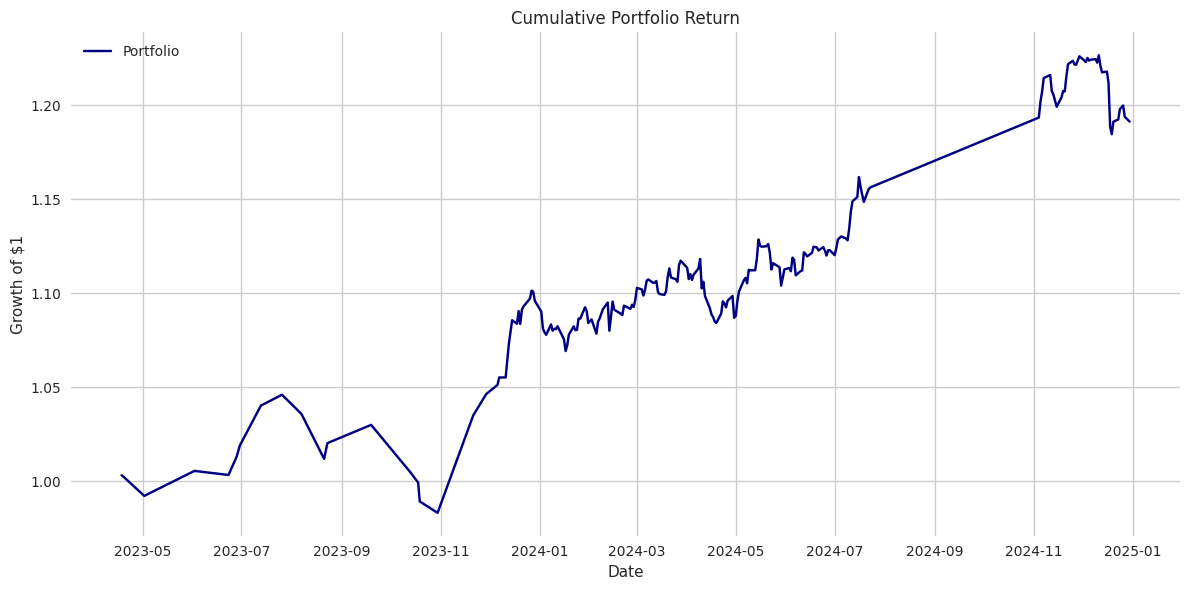

In [ ]:
# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(port_cum_returns, label='Portfolio', color='navy')
plt.title("Cumulative Portfolio Return")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**VaR & CVaR**

In [ ]:
# Define confidence level
confidence_level = 0.95

# Historical VaR
VaR_95 = np.percentile(port_returns, (1 - confidence_level) * 100)
CVaR_95 = port_returns[port_returns <= VaR_95].mean()

# Scale to 1-day loss on a $100,000 portfolio
portfolio_value = 100000
VaR_abs = -VaR_95 * portfolio_value
CVaR_abs = -CVaR_95 * portfolio_value

print("\nValue at Risk (VaR) - Historical Method:")
print(f"1-Day 95% VaR: {VaR_95:.2%} (${VaR_abs:,.2f})")
print(f"1-Day 95% Conditional VaR (CVaR): {CVaR_95:.2%} (${CVaR_abs:,.2f})")


Value at Risk (VaR) - Historical Method:
1-Day 95% VaR: -0.81% ($810.90)
1-Day 95% Conditional VaR (CVaR): -1.38% ($1,381.96)


**10-day Historical VaR**

In [ ]:
from scipy.stats import norm

# Portfolio value
portfolio_value = 100000
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)

# Historical VaR (already computed) ---
VaR_1d_hist = np.percentile(port_returns, (1 - confidence_level) * 100)
CVaR_1d_hist = port_returns[port_returns <= VaR_1d_hist].mean()

# 10-day Historical VaR using square-root-of-time rule
VaR_10d_hist = VaR_1d_hist * np.sqrt(10)
CVaR_10d_hist = CVaR_1d_hist * np.sqrt(10)

**1-day & 10-day Parametric VaR**

In [ ]:
# Parametric VaR (Normal Distribution) ---
mu = port_returns.mean()
sigma = port_returns.std()

VaR_1d_param = z_score * sigma
CVaR_1d_param = sigma * norm.pdf(z_score) / (1 - confidence_level)

VaR_10d_param = z_score * sigma * np.sqrt(10)
CVaR_10d_param = sigma * np.sqrt(10) * norm.pdf(z_score) / (1 - confidence_level)

In [ ]:
print("\n Historical VaR:")
print(f"1-Day 95% VaR: {VaR_1d_hist:.2%} (${ -VaR_1d_hist * portfolio_value:.2f})")
print(f"10-Day 95% VaR: {VaR_10d_hist:.2%} (${ -VaR_10d_hist * portfolio_value:.2f})")
print(f"1-Day 95% CVaR: {CVaR_1d_hist:.2%} (${ -CVaR_1d_hist * portfolio_value:.2f})")
print(f"10-Day 95% CVaR: {CVaR_10d_hist:.2%} (${ -CVaR_10d_hist * portfolio_value:.2f})")

print("\n Parametric VaR (Normal Distribution):")
print(f"1-Day 95% VaR: {VaR_1d_param:.2%} (${ -VaR_1d_param * portfolio_value:.2f})")
print(f"10-Day 95% VaR: {VaR_10d_param:.2%} (${ -VaR_10d_param * portfolio_value:.2f})")
print(f"1-Day 95% CVaR: {CVaR_1d_param:.2%} (${ -CVaR_1d_param * portfolio_value:.2f})")
print(f"10-Day 95% CVaR: {CVaR_10d_param:.2%} (${ -CVaR_10d_param * portfolio_value:.2f})")


 Historical VaR:
1-Day 95% VaR: -0.81% ($810.90)
10-Day 95% VaR: -2.56% ($2564.29)
1-Day 95% CVaR: -1.38% ($1381.96)
10-Day 95% CVaR: -4.37% ($4370.13)

 Parametric VaR (Normal Distribution):
1-Day 95% VaR: -1.16% ($1156.75)
10-Day 95% VaR: -3.66% ($3657.95)
1-Day 95% CVaR: 1.45% ($-1450.61)
10-Day 95% CVaR: 4.59% ($-4587.22)


# Kupiec Test
The Kupiec Test checks whether the number of times actual losses exceed the 1-day VaR is consistent with the expected frequency under the chosen confidence level.
- Null hypothesis (H₀): The model's violation rate is correct (accurate VaR).
- Alternative (H₁): The model underestimates or overestimates risk.
- It uses a likelihood ratio test and compares it to a $χ^2(1)$ distribution.

In [ ]:
from scipy.stats import chi2

# 1-day Historical VaR threshold already computed:
VaR_1d_hist = np.percentile(port_returns, (1 - confidence_level) * 100)

# Identify violations (actual returns less than the VaR)
violations = port_returns < VaR_1d_hist
x = violations.sum()         # Number of violations
N = len(port_returns)        # Total number of observations
alpha = 1 - confidence_level # Expected failure rate
p_hat = x / N                # Observed failure rate

# Kupiec Likelihood Ratio test statistic
LR_uc = -2 * (
    np.log(((1 - alpha) ** (N - x) * (alpha ** x)) /
           ((1 - p_hat) ** (N - x) * (p_hat ** x)))
)

# Critical value at 95% significance from chi-square with 1 df
crit_value = chi2.ppf(0.95, df=1)

# p-value
p_value = 1 - chi2.cdf(LR_uc, df=1)

# Results
print("\n Kupiec Test for 1-Day VaR Backtest:")
print(f"Total Observations: {N}")
print(f"VaR Violations: {x}")
print(f"Expected Violations (at α={alpha:.2%}): {int(alpha * N)}")
print(f"Observed Violation Rate: {p_hat:.2%}")
print(f"LR_uc Statistic: {LR_uc:.4f}")
print(f"Chi-Square Critical Value (95%): {crit_value:.4f}")
print(f"p-value: {p_value:.4f}")

if LR_uc < crit_value:
    print("Fail to reject H_0: VaR model is statistically acceptable.")
else:
    print("Reject H_0: VaR model fails Kupiec test (misspecified).")



 Kupiec Test for 1-Day VaR Backtest:
Total Observations: 211
VaR Violations: 11
Expected Violations (at α=5.00%): 10
Observed Violation Rate: 5.21%
LR_uc Statistic: 0.0199
Chi-Square Critical Value (95%): 3.8415
p-value: 0.8877
Fail to reject H_0: VaR model is statistically acceptable.


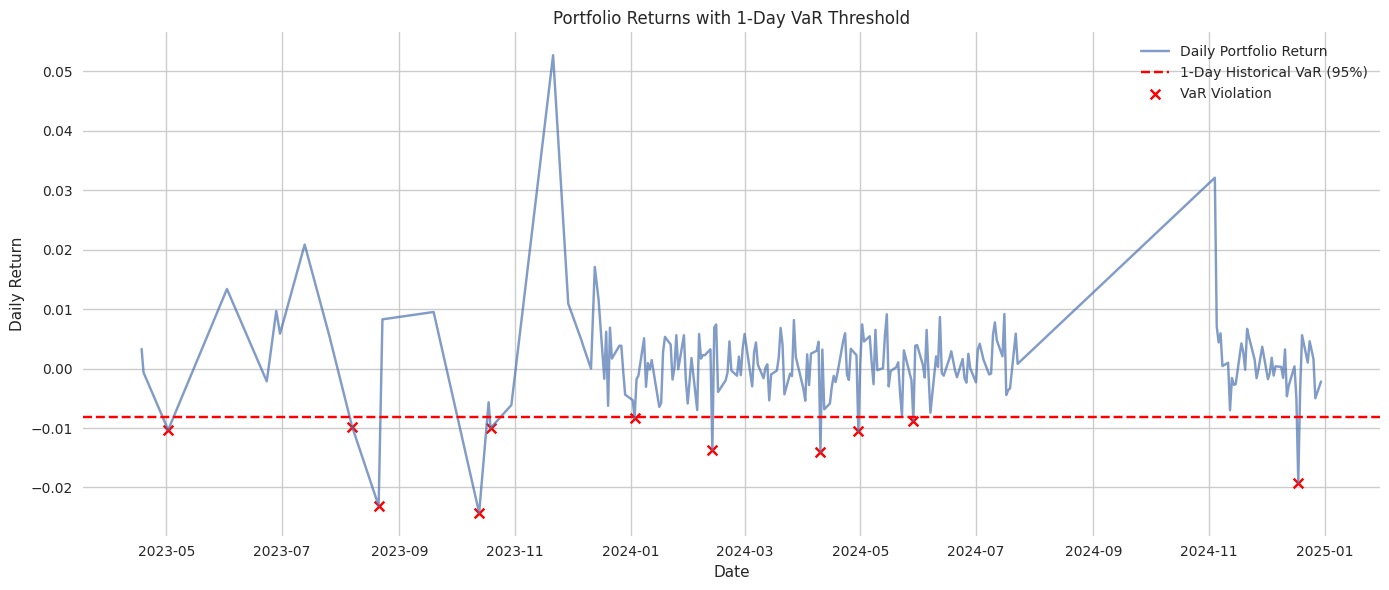

In [ ]:
# Plot VaR Violations
plt.figure(figsize=(14, 6))
plt.plot(port_returns, label='Daily Portfolio Return', alpha=0.7)
plt.axhline(VaR_1d_hist, color='red', linestyle='--', label='1-Day Historical VaR (95%)')
plt.scatter(port_returns.index[port_returns < VaR_1d_hist],
            port_returns[port_returns < VaR_1d_hist],
            color='red', marker='x', label='VaR Violation')
plt.title("Portfolio Returns with 1-Day VaR Threshold")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()